<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Dimensionality%20Reduction/UMAP/umap_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP (Uniform Manifold Approximation and Projection) from Scratch

This notebook implements a **conceptual and minimal version of UMAP** using only NumPy, no external libraries like `umap-learn`.

UMAP is a powerful nonlinear dimensionality reduction algorithm, ideal for **visualizing high-dimensional data** while preserving both local and global structures.

## What is UMAP?

**UMAP** is a fast and scalable alternative to t-SNE. It’s used to:
- Visualize high-dimensional data
- Maintain both **local neighborhoods** and **global structures**
- Reduce dimensions before clustering or classification

UMAP is based on:
- **Topological Data Analysis** (constructing a fuzzy graph of data)
- **Optimization** to match high-D and low-D neighborhoods

Compared to t-SNE:

| Metric              | t-SNE                  | UMAP                   |
|---------------------|------------------------|------------------------|
| Local Structure      | Preserved well       | Preserved well       |
| Global Structure     | Often distorted       | Preserved better      |
| Speed                | Slower             | Faster            |
| Interpretation       | Probabilistic           | Graph-theoretic         |

## Generate Sample High-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

X, y = make_blobs(n_samples=300, n_features=30, centers=4, cluster_std=2.5, random_state=42)
print("Shape of input data:", X.shape)

Shape of input data: (300, 30)


## Simplified UMAP Pipeline

> This is a heavily simplified version: we’ll build a k-nearest neighbor graph and optimize low-dimensional embeddings to preserve distances.

### Step 1: Build k-NN Graph

In [2]:
def knn_graph(X, k=10):
    distances = cdist(X, X)
    neighbors = np.argsort(distances, axis=1)[:, 1:k+1]
    return neighbors

### Step 2: Initialize Low-D Embedding

In [3]:
def initialize_embedding(n, dim=2):
    return np.random.normal(0, 1e-4, (n, dim))

### Step 3: Optimize (Preserve Neighborhoods)



In [4]:
def umap_simplified(X, k=10, dim=2, epochs=500, alpha=0.01):
    n = X.shape[0]
    neighbors = knn_graph(X, k)
    Y = initialize_embedding(n, dim)

    for epoch in range(epochs):
        for i in range(n):
            for j in neighbors[i]:
                diff = Y[i] - Y[j]
                dist = np.linalg.norm(diff)
                if dist > 0:
                    grad = 4 * (dist - 1) * (diff / dist)
                    Y[i] -= alpha * grad
                    Y[j] += alpha * grad  # Symmetric update

        if epoch % 100 == 0:
            print(f"Epoch {epoch}")

    return Y

## Run and Visualize

Epoch 0
Epoch 100
Epoch 200


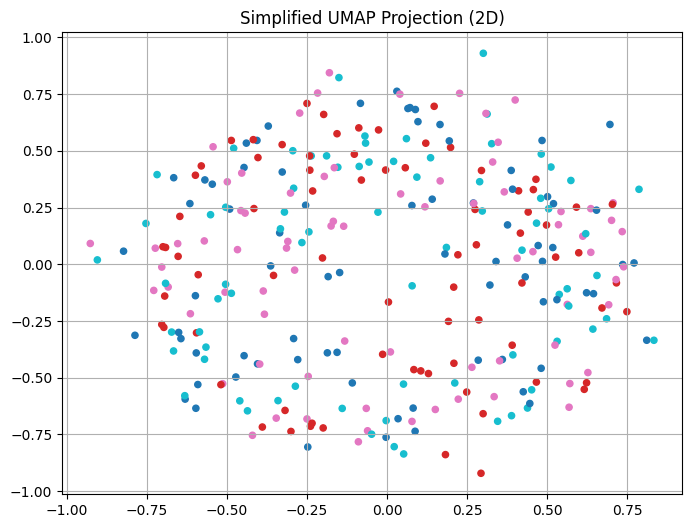

In [5]:
Y_umap = umap_simplified(X, k=15, dim=2, epochs=300, alpha=0.01)

plt.figure(figsize=(8, 6))
plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c=y, cmap='tab10', s=20)
plt.title("Simplified UMAP Projection (2D)")
plt.grid(True)
plt.show()

## Summary

- Implemented a simple version of **UMAP** using only NumPy
- Preserved neighborhood structure via a k-NN graph
- Optimized low-dimensional positions using symmetric updates
- Great for visualizing high-dimensional data in 2D
- t-SNE is probabilistic; UMAP is graph-based
